In [ ]:
!pip install control

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import control as ctl
from control import (TransferFunction)

plt.rcParams['figure.figsize'] = (8,8) # tamanho do gráfico
plt.rcParams['font.size'] = 14 # tamanho da letraimport matplotlib.pyplot as plt

O Lugar das Raízes começa nos polos da malha aberta: [-4.+0.j -2.+0.j]
O Lugar das Raízes termina nos zeros da malha aberta: [2.+4.j 2.-4.j]


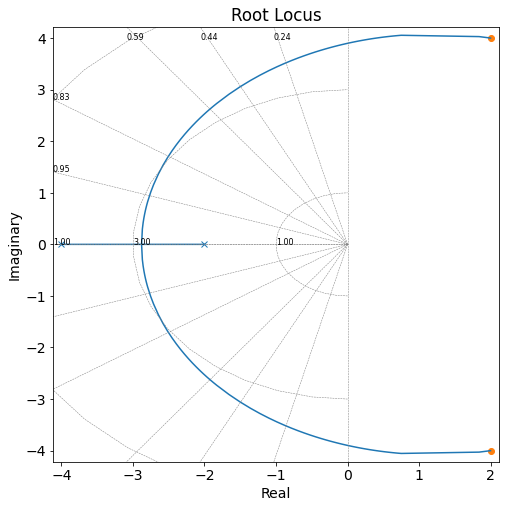

In [8]:
# Função Tranferência do sistema
H = TransferFunction([1,-4,20], [1,6,8])
print('O Lugar das Raízes começa nos polos da malha aberta:', ctl.pole(H)) # polos 
print('O Lugar das Raízes termina nos zeros da malha aberta:', ctl.zero(H)) # zeros
# Lugar das Raízes, argumento da função é a malha aberta
out = ctl.rlocus(H, kvect=None, xlim=None, ylim=None, plotstr=None, plot=True, print_gain=None, grid=None)


In [9]:
# marginalmente instável
K = 1.5 # gaho crítico (fator de amortecimento nulo)
malha_fechada = ctl.feedback(sys1 = K*H, sys2=1, sign=-1)# malha fechada
# Cálculo dos polos, fator de amortecimento e freq. natural
wn, damping, pole = ctl.damp(malha_fechada) 
# verificar que o fator de amortecimento é nulo

_____Eigenvalue______ Damping___ Frequency_
        -0    +3.899j          0      3.899
         0    -3.899j         -0      3.899


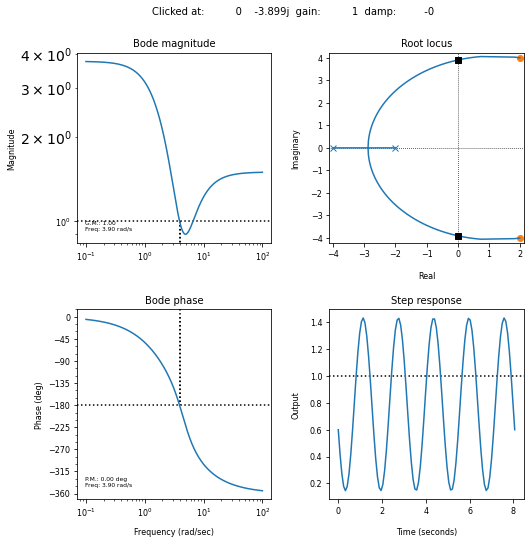

In [10]:
# https://python-control.readthedocs.io/en/latest/generated/control.sisotool.html
# O comando sisotool plota o Diagrama de Bode apra a malha aberta, 
# o lugar das raízes e a resposta ao degrau da malha fechada

# argumento malha aberta com ganho crítico 
ctl.sisotool(1.5*H)

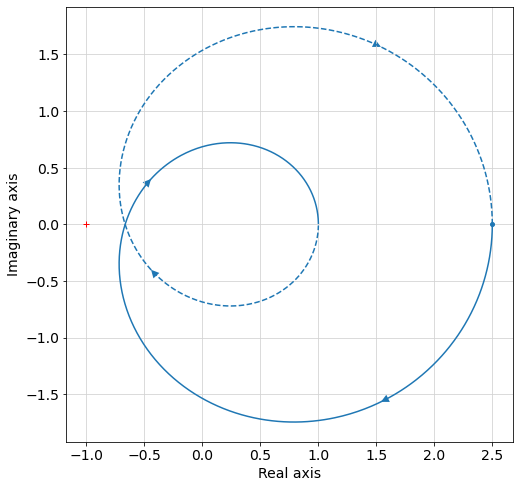

In [11]:
# verificação do Nyquist com vários ganhos
plt.figure(2)
ctl.nyquist_plot(1.0*H,label='K=1.0') # ganho menor que o crítico
#ctl.nyquist_plot(1.5*H,label='K=1.5') # ganho crítico
#ctl.nyquist_plot(2.5*H,label='K=2.5') # ganho maior que o crítico
plt.show()

